<a href="https://colab.research.google.com/github/lephuocdat2000/NhapmonCV/blob/master/ProjectCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [3]:
#Tính pp:
import math
arr_H=np.array([60,61,65,62,54,60,60,55,56,60])
uy_H=arr_H.sum()/len(arr_H)
H,S=0,0
for i in range(0,len(arr_H)):
   H+=(uy_H-arr_H[i])**2
xma_H=math.sqrt((1/len(arr_H))*H)

In [4]:
#img=cv2.imread('/content/Fq8hA.png',1)
def CreateMaskObj(img):
  hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  #Lấy kênh H
  H_space=hsv[:,:,0]
  #Tạo mask để xóa background
  mask=np.ones((H_space.shape[0],H_space.shape[1]) )
  mask[np.where((H_space>=uy_H-3*xma_H)&(H_space<=uy_H+3*xma_H))]=0
  mask_obj=[mask,mask,mask]
  mask_obj=np.stack(mask_obj,axis=2)
  mask_obj=mask_obj.astype('uint8')
  img=img*mask_obj
  mask_obj2=1-mask_obj
  return img,mask_obj2

In [5]:
#Background chuyển động 
cap=cv2.VideoCapture('/content/Video backgound nen xanh [Chroma key Backgrounds].mp4')
if (cap.isOpened()==False):
    print("Error opening video stream or file")
out = cv2.VideoWriter('backgroundmoving.avi',cv2.VideoWriter_fourcc('X','V','I','D'), 20,(720,1280))    
effect=cv2.imread('/content/cce0c7db236b5e269c7721de801bb8f7.jpg',1)
effect=cv2.resize(effect,(1280,720))
while (True):
   ret,frame=cap.read()
   if ret==True:
       #resize frame lai bang kich thuoc cua obj
       image = Image.fromarray(frame)
       image_arr=asarray(image)
       img,mask_obj2=CreateMaskObj(image_arr)
       #effect = effect.resize((image_arr.shape[1],image_arr.shape[0]))
       #effect=asarray(effect)
       res =(effect*mask_obj2).astype('uint8')+img
       print(res.shape)
       out.write(res)
       if cv2.waitKey(1) == ord('q'):
          break
   else: break
out.release()

Streaming output truncated to the last 5000 lines.
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720

In [20]:
#Đọc video, background tĩnh
cap=cv2.VideoCapture('/content/ezgif.com-gif-maker.mov')
if (cap.isOpened()==False):
    print("Error opening video stream or file")
out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('X','V','I','D'), 20,(img.shape[1],img.shape[0]))
while (True):
   ret,frame=cap.read()
   if ret==True:
      #resize frame lai bang kich thuoc cua obj
      image = Image.fromarray(frame)
      image = image.resize((img.shape[1],img.shape[0]))
      image_arr=asarray(image)
      # double exposure frame va obj 
      res =(image*mask_obj2).astype('uint8')+img
      out.write(res)
      if cv2.waitKey(1) == ord('q'):
        break
   else: break
out.release()


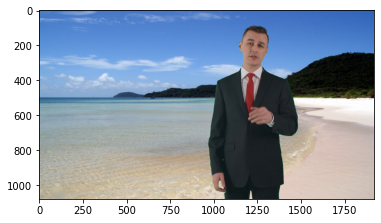

In [15]:
#Tạo mask cho effect
effect=cv2.imread('/content/Phu_quoc_plage_sao.jpg',1)
effect=cv2.resize(effect,(img.shape[1],img.shape[0]))
mask_obj2=1-mask_obj
result=(effect*mask_obj2).astype('uint8')+img
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))